In [2]:
#数据清洗
import pandas as pd
import numpy as np

In [49]:
dataset = pd.read_csv("data/Data.csv")
dataset

,Country,Age,Salary,Purchased
0,France,44.0,72000.0,No
1,Spain,27.0,48000.0,Yes
2,Germany,30.0,54000.0,No
3,Spain,38.0,61000.0,No
4,Germany,40.0,NaN,Yes
5,France,35.0,58000.0,Yes
6,Spain,NaN,52000.0,No
7,France,48.0,79000.0,Yes
8,Germany,50.0,83000.0,No
9,France,37.0,67000.0,Yes


In [48]:
#查看缺失数据，并对其进行处理
#number_col
#插值函数
from scipy.interpolate import lagrange
def ployinterp_columns(s,n,k=5):
    #取前后k个数据
    labels = list(range(n-k,n))+list(range(n+1,n+1+k))
    y = s.loc[s.index.intersection(labels)]
    y = y[y.notnull()]#提出空值
    return lagrange(y.index,list(y))(n)

number_col = ["Age","Salary"]
for i in number_col:
    for j in range(len(dataset)):
        if (dataset[i].isnull())[j]:
            dataset[i][j] = ployinterp_columns(dataset[i],j)
            pass
dataset

,Country,Age,Salary,Purchased
0,France,44.000000,72000.000000,No
1,Spain,27.000000,48000.000000,Yes
2,Germany,30.000000,54000.000000,No
3,Spain,38.000000,61000.000000,No
4,Germany,40.000000,68603.174603,Yes
5,France,35.000000,58000.000000,Yes
6,Spain,36.464286,52000.000000,No
7,France,48.000000,79000.000000,Yes
8,Germany,50.000000,83000.000000,No
9,France,37.000000,67000.000000,Yes


<AxesSubplot:ylabel='Age'>

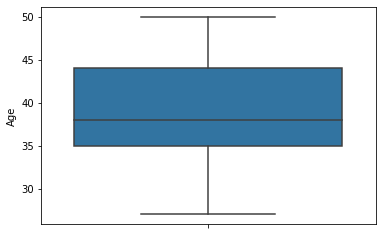

In [51]:
#箱型图判断
import seaborn as sns
sns.boxplot(
    data = dataset,
    y="Age"
)

In [5]:
dataset = pd.read_csv("data/Data.csv")
print(dataset)
#前行后列
# :-1 取除了最后一列前面的列
X = dataset.iloc[:,:-1].values
#只取最后一列
Y = dataset.iloc[:,3].values
print(X)
print(Y)

   Country   Age   Salary Purchased
0   France  44.0  72000.0        No
1    Spain  27.0  48000.0       Yes
2  Germany  30.0  54000.0        No
3    Spain  38.0  61000.0        No
4  Germany  40.0      NaN       Yes
5   France  35.0  58000.0       Yes
6    Spain   NaN  52000.0        No
7   France  48.0  79000.0       Yes
8  Germany  50.0  83000.0        No
9   France  37.0  67000.0       Yes
[['France' 44.0 72000.0]
 ['Spain' 27.0 48000.0]
 ['Germany' 30.0 54000.0]
 ['Spain' 38.0 61000.0]
 ['Germany' 40.0 nan]
 ['France' 35.0 58000.0]
 ['Spain' nan 52000.0]
 ['France' 48.0 79000.0]
 ['Germany' 50.0 83000.0]
 ['France' 37.0 67000.0]]
['No' 'Yes' 'No' 'No' 'Yes' 'Yes' 'No' 'Yes' 'No' 'Yes']


In [6]:
#处理丢失数据
#0.22以上版本的sklearn去除了Imputer类，因此需要使用SimpleImputer类代替
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.NaN,strategy="mean")
imputer = imputer.fit(X[:,1:3])
X[:,1:3] = imputer.transform(X[:,1:3])
print(X)

[['France' 44.0 72000.0]
 ['Spain' 27.0 48000.0]
 ['Germany' 30.0 54000.0]
 ['Spain' 38.0 61000.0]
 ['Germany' 40.0 63777.77777777778]
 ['France' 35.0 58000.0]
 ['Spain' 38.77777777777778 52000.0]
 ['France' 48.0 79000.0]
 ['Germany' 50.0 83000.0]
 ['France' 37.0 67000.0]]


In [13]:
#解析分类数据
#将类别使用数字编码分类,更加易于处理
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.compose import ColumnTransformer
labelencoder_X = LabelEncoder()
X[:,0] = labelencoder_X.fit_transform(X[:,0])
# print(X)
ct = ColumnTransformer(
    [('one_hot_encoder', OneHotEncoder(categories='auto'), [0])],   # The column numbers to be transformed (here is [0] but can be [0, 1, 3])
    remainder='passthrough'                                         # Leave the rest of the columns untouched
)
X = ct.fit_transform(X)
labelencoder_Y = LabelEncoder()
Y = labelencoder_Y.fit_transform(Y)
print(X)
print(Y)

[[1.0 0.0 0.0 44.0 72000.0]
 [0.0 0.0 1.0 27.0 48000.0]
 [0.0 1.0 0.0 30.0 54000.0]
 [0.0 0.0 1.0 38.0 61000.0]
 [0.0 1.0 0.0 40.0 63777.77777777778]
 [1.0 0.0 0.0 35.0 58000.0]
 [0.0 0.0 1.0 38.77777777777778 52000.0]
 [1.0 0.0 0.0 48.0 79000.0]
 [0.0 1.0 0.0 50.0 83000.0]
 [1.0 0.0 0.0 37.0 67000.0]]
[0 1 0 0 1 1 0 1 0 1]


In [16]:
#拆分数据训练集和测试集
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=0)
print("训练集")
print(X_train)
print(Y_train)
print("测试集")
print(X_test)
print(Y_test)



训练集
[[0.0 1.0 0.0 40.0 63777.77777777778]
 [1.0 0.0 0.0 37.0 67000.0]
 [0.0 0.0 1.0 27.0 48000.0]
 [0.0 0.0 1.0 38.77777777777778 52000.0]
 [1.0 0.0 0.0 48.0 79000.0]
 [0.0 0.0 1.0 38.0 61000.0]
 [1.0 0.0 0.0 44.0 72000.0]
 [1.0 0.0 0.0 35.0 58000.0]]
[1 1 1 0 1 0 0 1]
测试集
[[0.0 1.0 0.0 30.0 54000.0]
 [0.0 1.0 0.0 50.0 83000.0]]
[0 0]


In [17]:
#特征量化
#这个使用的是特征标准化
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.fit_transform(X_test)
print(X_train)
print(X_test)

[[-1.          2.64575131 -0.77459667  0.26306757  0.12381479]
 [ 1.         -0.37796447 -0.77459667 -0.25350148  0.46175632]
 [-1.         -0.37796447  1.29099445 -1.97539832 -1.53093341]
 [-1.         -0.37796447  1.29099445  0.05261351 -1.11141978]
 [ 1.         -0.37796447 -0.77459667  1.64058505  1.7202972 ]
 [-1.         -0.37796447  1.29099445 -0.0813118  -0.16751412]
 [ 1.         -0.37796447 -0.77459667  0.95182631  0.98614835]
 [ 1.         -0.37796447 -0.77459667 -0.59788085 -0.48214934]]
[[ 0.  0.  0. -1. -1.]
 [ 0.  0.  0.  1.  1.]]
